In [1]:
import requests
import seaborn as sns
from matplotlib.figure import Figure
import io
import PIL

In [2]:
sns.set_style("darkgrid") #sets seaborn plot style

In [19]:
#Define API get requests
def get_mars_weather():
    API_key = "DEMO_KEY"
    URL = "https://api.nasa.gov/insight_weather/?api_key=" + API_key + "&feedtype=json&ver=1.0"
    response = requests.get(URL)
    data = response.json()
    
    
    if response.status_code != 200:
        raise Exception(("Error: " + str(response.status_code)))
    
    else:
        return(data)
    
def get_mars_photo():
    URL = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/latest_photos"
    params = {'api_key':'DEMO_KEY'}
    response = requests.get(URL, params=params)
    
    if response.status_code != 200:
        raise Exception(("Error: " + str(response.status_code)))

    image_URL = response.json()["latest_photos"][1]["img_src"]
    image_data = requests.get(image_URL, stream=True)
        
    if image_data.status_code != 200:
        raise Exception(("Error: " + str(response.status_code)))
    
    image = io.BytesIO(image_data.content)
    
    return PIL.Image.open(image)

In [4]:
def get_mars_figure():
    data = get_mars_weather()

    max_temp = []
    min_temp = []
    av_temp = []
    sol = []
    data = get_mars_weather()
    for i in data:
        if not (i.isdigit()):
            break
        mn = data[i]["AT"]["mn"]
        mx = data[i]["AT"]["mx"]
        av = data[i]["AT"]["av"]
        sol.append(int(i))
        min_temp.append(mn)
        max_temp.append(mx)
        av_temp.append(av)

    fig = Figure()
    sub = fig.add_subplot(111)
    sub.plot(sol, max_temp, marker='o', label = "maximum")
    sub.plot(sol, min_temp, marker='o', label = "minimum")
    sub.plot(sol, av_temp, marker='o', label = "average")
    sub.legend()
    sub.set_xlabel("Sol")
    sub.set_ylabel("Temperature ( $^{\circ}$C)")
    
    return fig

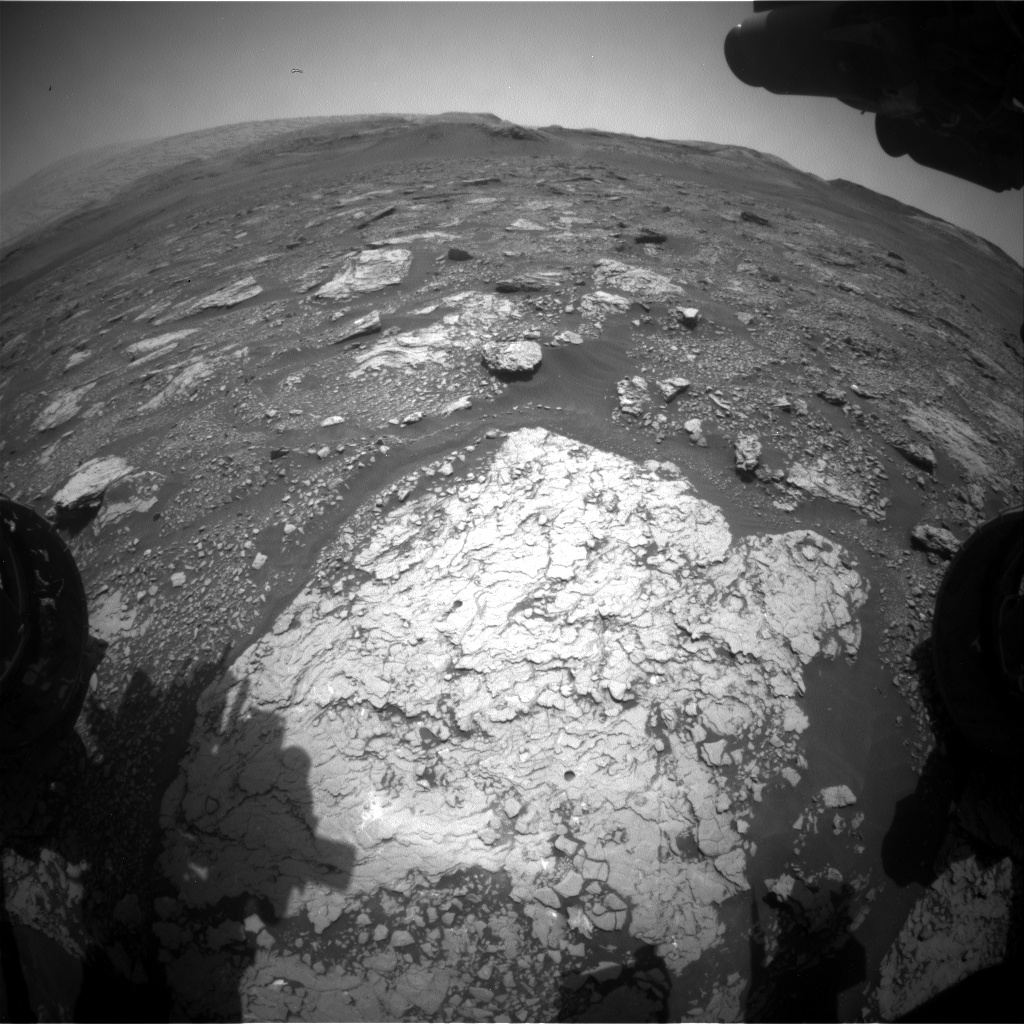

In [20]:
get_mars_photo()